In [1]:
import pandas as pd
import numpy as np
import math
import tensorflow
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Flatten,Dense,MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau

In [2]:
(X, y), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 30s 0us/step


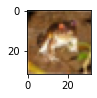

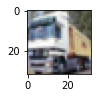

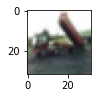

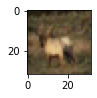

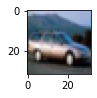

In [3]:
#plotting
from matplotlib import pyplot
for i in range(5):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [4]:
#shape of dataset
print('X_train: ' + str(X.shape))
print('Y_train: ' + str(y.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


In [5]:
X = X.reshape(X.shape[0], 32,32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

# **Reshaping the inputs**

In [6]:
X = X.astype('float32')
X_test = X_test.astype('float32')

In [7]:
train_data_mean = np.mean(X,axis=0)
for i in range (X.shape[0]):
    X[i,:] -= train_data_mean
    
for i in range (X_test.shape[0]):
    X_test[i,:] -= train_data_mean

In [8]:
# Normalizing the Input space
train_data_dev = np.std(X,axis=0)
for i in range (X.shape[0]):
    X[i,:] /= train_data_dev 
    
for i in range (X_test.shape[0]):
    X_test[i,:] /= train_data_dev 

# **One Hot Encoding The Output**

In [9]:
y = to_categorical(y, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [10]:
class Lenet():
  def build(self):
    model = Sequential()
    model.add(Conv2D(filters= 6, kernel_size=5, activation="relu", input_shape=(32, 32, 3)))
    model.add(MaxPool2D(pool_size=(2, 2), strides= (2, 2)))
    model.add(Conv2D(filters= 16, kernel_size=5, activation="relu"))
    model.add(MaxPool2D(pool_size=(2, 2), strides= (2, 2)))
    model.add(Conv2D(filters= 120, kernel_size=5, activation="relu"))
    model.add(Flatten())
    model.add(Dense(84, activation="relu"))
    model.add(Dense(10, activation="softmax"))
    self.model = model

  def re_intialize(self):
    self.build()

  def summary(self):
    self.model.summary()

  def fit(self, X, y, Epochs, lr, batch, x_val=None, y_val= None ):
    adam=tensorflow.keras.optimizers.Adam(learning_rate= lr,beta_1 =0.9)
    reduce_lr = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.2, min_lr=1e-6)

    self.model.compile(optimizer= adam,loss='categorical_crossentropy',metrics=['accuracy'])
    self.model.fit(X,y,epochs=Epochs,validation_data=(x_val,y_val),batch_size = batch,callbacks=[reduce_lr])

  def evaluate(self,x_val,y_val):
        loss,accuracy = self.model.evaluate(x_val,y_val)
        return (loss,accuracy)

In [11]:
LeNet = Lenet()
LeNet.build()
LeNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

# **1. What is the effect of learning rate on the training process? Which performed best?** 

In [12]:
learning_rate=[0.001,0.0005,0.0001]
loss = []
accuracy = []
LeNet = Lenet()
LeNet.build()
for lr in learning_rate:
    LeNet.re_intialize()
    LeNet.fit(X,y, Epochs= 25,lr= lr, batch= int(X.shape[0]/50),x_val= X_test,y_val=y_test)
    l,a = LeNet.evaluate(X_test,y_test)
    loss.append(l)
    accuracy.append(a)

Epoch 1/25
47/50 [===========================>..] - ETA: 0s - loss: 1.8957 - accuracy: 0.3130

50/50 [==============================] - 10s 26ms/step - loss: 1.8819 - accuracy: 0.3181 - val_loss: 1.6413 - val_accuracy: 0.4148 - lr: 0.0010
Epoch 2/25
48/50 [===========================>..] - ETA: 0s - loss: 1.5557 - accuracy: 0.4428

50/50 [==============================] - 1s 18ms/step - loss: 1.5523 - accuracy: 0.4443 - val_loss: 1.4867 - val_accuracy: 0.4690 - lr: 0.0010
Epoch 3/25
47/50 [===========================>..] - ETA: 0s - loss: 1.4378 - accuracy: 0.4877

50/50 [==============================] - 1s 17ms/step - loss: 1.4369 - accuracy: 0.4876 - val_loss: 1.4144 - val_accuracy: 0.4889 - lr: 0.0010
Epoch 4/25
49/50 [============================>.] - ETA: 0s - loss: 1.3600 - accuracy: 0.5163

50/50 [==============================] - 1s 19ms/step - loss: 1.3591 - accuracy: 0.5165 - val_loss: 1.3389 - val_accuracy: 0.5251 - lr: 0.0010
Epoch 5/25
48/50 [===========================>..] - ETA: 0s - loss: 1.2980 - accuracy: 0.5412

50/50 [==============================] - 1s 17ms/step - loss: 1.2973 - accuracy: 0.5417 - val_loss: 1.3111 - val_accuracy: 0.5347 - lr: 0.0010
Epoch 6/25
49/50 [============================>.] - ETA: 0s - loss: 1.2538 - accuracy: 0.5568

50/50 [==============================] - 1s 17ms/step - loss: 1.2544 - accuracy: 0.5561 - val_loss: 1.2717 - val_accuracy: 0.5463 - lr: 0.0010
Epoch 7/25
48/50 [===========================>..] - ETA: 0s - loss: 1.2133 - accuracy: 0.5705

50/50 [==============================] - 1s 18ms/step - loss: 1.2118 - accuracy: 0.5710 - val_loss: 1.2365 - val_accuracy: 0.5630 - lr: 0.0010
Epoch 8/25
49/50 [============================>.] - ETA: 0s - loss: 1.1778 - accuracy: 0.5850

50/50 [==============================] - 1s 17ms/step - loss: 1.1774 - accuracy: 0.5849 - val_loss: 1.2216 - val_accuracy: 0.5644 - lr: 0.0010
Epoch 9/25
48/50 [===========================>..] - ETA: 0s - loss: 1.1547 - accuracy: 0.5928

50/50 [==============================] - 1s 19ms/step - loss: 1.1546 - accuracy: 0.5928 - val_loss: 1.1896 - val_accuracy: 0.5828 - lr: 0.0010
Epoch 10/25
49/50 [============================>.] - ETA: 0s - loss: 1.1249 - accuracy: 0.6029

50/50 [==============================] - 1s 19ms/step - loss: 1.1246 - accuracy: 0.6027 - val_loss: 1.1931 - val_accuracy: 0.5815 - lr: 0.0010
Epoch 11/25
50/50 [==============================] - ETA: 0s - loss: 1.1043 - accuracy: 0.6095

50/50 [==============================] - 1s 18ms/step - loss: 1.1043 - accuracy: 0.6095 - val_loss: 1.1632 - val_accuracy: 0.5917 - lr: 0.0010
Epoch 12/25
50/50 [==============================] - ETA: 0s - loss: 1.0877 - accuracy: 0.6148

50/50 [==============================] - 1s 18ms/step - loss: 1.0877 - accuracy: 0.6148 - val_loss: 1.1538 - val_accuracy: 0.5951 - lr: 0.0010
Epoch 13/25
49/50 [============================>.] - ETA: 0s - loss: 1.0631 - accuracy: 0.6265

50/50 [==============================] - 1s 17ms/step - loss: 1.0623 - accuracy: 0.6267 - val_loss: 1.1413 - val_accuracy: 0.5962 - lr: 0.0010
Epoch 14/25
48/50 [===========================>..] - ETA: 0s - loss: 1.0434 - accuracy: 0.6340

50/50 [==============================] - 1s 18ms/step - loss: 1.0442 - accuracy: 0.6335 - val_loss: 1.1307 - val_accuracy: 0.6026 - lr: 0.0010
Epoch 15/25
50/50 [==============================] - ETA: 0s - loss: 1.0263 - accuracy: 0.6393

50/50 [==============================] - 1s 19ms/step - loss: 1.0263 - accuracy: 0.6393 - val_loss: 1.1238 - val_accuracy: 0.6098 - lr: 0.0010
Epoch 16/25
49/50 [============================>.] - ETA: 0s - loss: 1.0048 - accuracy: 0.6487

50/50 [==============================] - 1s 17ms/step - loss: 1.0051 - accuracy: 0.6488 - val_loss: 1.1250 - val_accuracy: 0.6034 - lr: 0.0010
Epoch 17/25
50/50 [==============================] - ETA: 0s - loss: 0.9957 - accuracy: 0.6493

50/50 [==============================] - 1s 18ms/step - loss: 0.9957 - accuracy: 0.6493 - val_loss: 1.1029 - val_accuracy: 0.6173 - lr: 0.0010
Epoch 18/25
48/50 [===========================>..] - ETA: 0s - loss: 0.9786 - accuracy: 0.6561

50/50 [==============================] - 1s 18ms/step - loss: 0.9787 - accuracy: 0.6561 - val_loss: 1.1030 - val_accuracy: 0.6195 - lr: 0.0010
Epoch 19/25
47/50 [===========================>..] - ETA: 0s - loss: 0.9575 - accuracy: 0.6655

50/50 [==============================] - 1s 18ms/step - loss: 0.9583 - accuracy: 0.6647 - val_loss: 1.0988 - val_accuracy: 0.6189 - lr: 0.0010
Epoch 20/25
47/50 [===========================>..] - ETA: 0s - loss: 0.9444 - accuracy: 0.6685

50/50 [==============================] - 1s 18ms/step - loss: 0.9438 - accuracy: 0.6690 - val_loss: 1.1025 - val_accuracy: 0.6155 - lr: 0.0010
Epoch 21/25
47/50 [===========================>..] - ETA: 0s - loss: 0.9336 - accuracy: 0.6732

50/50 [==============================] - 1s 18ms/step - loss: 0.9327 - accuracy: 0.6734 - val_loss: 1.0988 - val_accuracy: 0.6178 - lr: 0.0010
Epoch 22/25
49/50 [============================>.] - ETA: 0s - loss: 0.9214 - accuracy: 0.6770

50/50 [==============================] - 1s 19ms/step - loss: 0.9216 - accuracy: 0.6769 - val_loss: 1.0981 - val_accuracy: 0.6211 - lr: 0.0010
Epoch 23/25
49/50 [============================>.] - ETA: 0s - loss: 0.9092 - accuracy: 0.6815

50/50 [==============================] - 1s 17ms/step - loss: 0.9103 - accuracy: 0.6811 - val_loss: 1.0923 - val_accuracy: 0.6258 - lr: 0.0010
Epoch 24/25
49/50 [============================>.] - ETA: 0s - loss: 0.8906 - accuracy: 0.6881

50/50 [==============================] - 1s 17ms/step - loss: 0.8914 - accuracy: 0.6878 - val_loss: 1.0849 - val_accuracy: 0.6268 - lr: 0.0010
Epoch 25/25
49/50 [============================>.] - ETA: 0s - loss: 0.8844 - accuracy: 0.6894

313/313 [==============================] - 1s 3ms/step - loss: 1.1020 - accuracy: 0.6239
Epoch 1/25
49/50 [============================>.] - ETA: 0s - loss: 2.0318 - accuracy: 0.2647

50/50 [==============================] - 2s 26ms/step - loss: 2.0277 - accuracy: 0.2660 - val_loss: 1.8050 - val_accuracy: 0.3610 - lr: 5.0000e-04
Epoch 2/25
48/50 [===========================>..] - ETA: 0s - loss: 1.7342 - accuracy: 0.3751

50/50 [==============================] - 1s 17ms/step - loss: 1.7315 - accuracy: 0.3755 - val_loss: 1.6444 - val_accuracy: 0.4090 - lr: 5.0000e-04
Epoch 3/25
50/50 [==============================] - ETA: 0s - loss: 1.6027 - accuracy: 0.4203

50/50 [==============================] - 1s 18ms/step - loss: 1.6027 - accuracy: 0.4203 - val_loss: 1.5524 - val_accuracy: 0.4353 - lr: 5.0000e-04
Epoch 4/25
47/50 [===========================>..] - ETA: 0s - loss: 1.5298 - accuracy: 0.4490

50/50 [==============================] - 1s 18ms/step - loss: 1.5273 - accuracy: 0.4498 - val_loss: 1.5060 - val_accuracy: 0.4591 - lr: 5.0000e-04
Epoch 5/25
50/50 [==============================] - ETA: 0s - loss: 1.4745 - accuracy: 0.4702

50/50 [==============================] - 1s 18ms/step - loss: 1.4745 - accuracy: 0.4702 - val_loss: 1.4577 - val_accuracy: 0.4792 - lr: 5.0000e-04
Epoch 6/25
48/50 [===========================>..] - ETA: 0s - loss: 1.4387 - accuracy: 0.4856

50/50 [==============================] - 1s 19ms/step - loss: 1.4385 - accuracy: 0.4855 - val_loss: 1.4235 - val_accuracy: 0.4917 - lr: 5.0000e-04
Epoch 7/25
47/50 [===========================>..] - ETA: 0s - loss: 1.3960 - accuracy: 0.5021

50/50 [==============================] - 1s 17ms/step - loss: 1.3963 - accuracy: 0.5015 - val_loss: 1.4034 - val_accuracy: 0.5041 - lr: 5.0000e-04
Epoch 8/25
48/50 [===========================>..] - ETA: 0s - loss: 1.3681 - accuracy: 0.5127

50/50 [==============================] - 1s 19ms/step - loss: 1.3670 - accuracy: 0.5132 - val_loss: 1.3708 - val_accuracy: 0.5086 - lr: 5.0000e-04
Epoch 9/25
48/50 [===========================>..] - ETA: 0s - loss: 1.3311 - accuracy: 0.5289

50/50 [==============================] - 1s 19ms/step - loss: 1.3321 - accuracy: 0.5281 - val_loss: 1.3427 - val_accuracy: 0.5209 - lr: 5.0000e-04
Epoch 10/25
48/50 [===========================>..] - ETA: 0s - loss: 1.3053 - accuracy: 0.5383

50/50 [==============================] - 1s 17ms/step - loss: 1.3048 - accuracy: 0.5387 - val_loss: 1.3331 - val_accuracy: 0.5261 - lr: 5.0000e-04
Epoch 11/25
47/50 [===========================>..] - ETA: 0s - loss: 1.2789 - accuracy: 0.5477

50/50 [==============================] - 1s 19ms/step - loss: 1.2785 - accuracy: 0.5475 - val_loss: 1.3068 - val_accuracy: 0.5363 - lr: 5.0000e-04
Epoch 12/25
48/50 [===========================>..] - ETA: 0s - loss: 1.2564 - accuracy: 0.5554

50/50 [==============================] - 1s 17ms/step - loss: 1.2571 - accuracy: 0.5551 - val_loss: 1.2983 - val_accuracy: 0.5424 - lr: 5.0000e-04
Epoch 13/25
49/50 [============================>.] - ETA: 0s - loss: 1.2374 - accuracy: 0.5640

50/50 [==============================] - 1s 17ms/step - loss: 1.2374 - accuracy: 0.5640 - val_loss: 1.2634 - val_accuracy: 0.5547 - lr: 5.0000e-04
Epoch 14/25
50/50 [==============================] - ETA: 0s - loss: 1.2224 - accuracy: 0.5678

50/50 [==============================] - 1s 18ms/step - loss: 1.2224 - accuracy: 0.5678 - val_loss: 1.2632 - val_accuracy: 0.5497 - lr: 5.0000e-04
Epoch 15/25
49/50 [============================>.] - ETA: 0s - loss: 1.2038 - accuracy: 0.5755

50/50 [==============================] - 1s 17ms/step - loss: 1.2037 - accuracy: 0.5755 - val_loss: 1.2441 - val_accuracy: 0.5586 - lr: 5.0000e-04
Epoch 16/25
48/50 [===========================>..] - ETA: 0s - loss: 1.1895 - accuracy: 0.5805

50/50 [==============================] - 1s 17ms/step - loss: 1.1894 - accuracy: 0.5802 - val_loss: 1.2288 - val_accuracy: 0.5660 - lr: 5.0000e-04
Epoch 17/25
48/50 [===========================>..] - ETA: 0s - loss: 1.1748 - accuracy: 0.5873

50/50 [==============================] - 1s 19ms/step - loss: 1.1766 - accuracy: 0.5870 - val_loss: 1.2463 - val_accuracy: 0.5573 - lr: 5.0000e-04
Epoch 18/25
49/50 [============================>.] - ETA: 0s - loss: 1.1628 - accuracy: 0.5910

50/50 [==============================] - 1s 18ms/step - loss: 1.1636 - accuracy: 0.5906 - val_loss: 1.2231 - val_accuracy: 0.5711 - lr: 5.0000e-04
Epoch 19/25
47/50 [===========================>..] - ETA: 0s - loss: 1.1469 - accuracy: 0.5969

50/50 [==============================] - 1s 17ms/step - loss: 1.1490 - accuracy: 0.5959 - val_loss: 1.2082 - val_accuracy: 0.5726 - lr: 5.0000e-04
Epoch 20/25
49/50 [============================>.] - ETA: 0s - loss: 1.1377 - accuracy: 0.5997

50/50 [==============================] - 1s 17ms/step - loss: 1.1394 - accuracy: 0.5997 - val_loss: 1.2032 - val_accuracy: 0.5786 - lr: 5.0000e-04
Epoch 21/25
49/50 [============================>.] - ETA: 0s - loss: 1.1309 - accuracy: 0.6023

50/50 [==============================] - 1s 17ms/step - loss: 1.1312 - accuracy: 0.6019 - val_loss: 1.2095 - val_accuracy: 0.5737 - lr: 5.0000e-04
Epoch 22/25
48/50 [===========================>..] - ETA: 0s - loss: 1.1217 - accuracy: 0.6047

50/50 [==============================] - 1s 17ms/step - loss: 1.1232 - accuracy: 0.6048 - val_loss: 1.1925 - val_accuracy: 0.5802 - lr: 5.0000e-04
Epoch 23/25
48/50 [===========================>..] - ETA: 0s - loss: 1.1128 - accuracy: 0.6105

50/50 [==============================] - 1s 19ms/step - loss: 1.1126 - accuracy: 0.6105 - val_loss: 1.1818 - val_accuracy: 0.5829 - lr: 5.0000e-04
Epoch 24/25
47/50 [===========================>..] - ETA: 0s - loss: 1.1038 - accuracy: 0.6140

50/50 [==============================] - 1s 19ms/step - loss: 1.1024 - accuracy: 0.6140 - val_loss: 1.1675 - val_accuracy: 0.5868 - lr: 5.0000e-04
Epoch 25/25
47/50 [===========================>..] - ETA: 0s - loss: 1.0879 - accuracy: 0.6173

313/313 [==============================] - 1s 3ms/step - loss: 1.1711 - accuracy: 0.5928
Epoch 1/25
49/50 [============================>.] - ETA: 0s - loss: 2.2449 - accuracy: 0.1747

50/50 [==============================] - 2s 26ms/step - loss: 2.2428 - accuracy: 0.1759 - val_loss: 2.1480 - val_accuracy: 0.2328 - lr: 1.0000e-04
Epoch 2/25
49/50 [============================>.] - ETA: 0s - loss: 2.0551 - accuracy: 0.2694

50/50 [==============================] - 1s 18ms/step - loss: 2.0534 - accuracy: 0.2698 - val_loss: 1.9627 - val_accuracy: 0.3122 - lr: 1.0000e-04
Epoch 3/25
47/50 [===========================>..] - ETA: 0s - loss: 1.8997 - accuracy: 0.3346

50/50 [==============================] - 1s 18ms/step - loss: 1.8970 - accuracy: 0.3355 - val_loss: 1.8305 - val_accuracy: 0.3632 - lr: 1.0000e-04
Epoch 4/25
49/50 [============================>.] - ETA: 0s - loss: 1.7903 - accuracy: 0.3725

50/50 [==============================] - 1s 18ms/step - loss: 1.7901 - accuracy: 0.3723 - val_loss: 1.7477 - val_accuracy: 0.3845 - lr: 1.0000e-04
Epoch 5/25
48/50 [===========================>..] - ETA: 0s - loss: 1.7189 - accuracy: 0.3963

50/50 [==============================] - 1s 17ms/step - loss: 1.7186 - accuracy: 0.3966 - val_loss: 1.6886 - val_accuracy: 0.4089 - lr: 1.0000e-04
Epoch 6/25
49/50 [============================>.] - ETA: 0s - loss: 1.6659 - accuracy: 0.4129

50/50 [==============================] - 1s 17ms/step - loss: 1.6652 - accuracy: 0.4129 - val_loss: 1.6507 - val_accuracy: 0.4214 - lr: 1.0000e-04
Epoch 7/25
48/50 [===========================>..] - ETA: 0s - loss: 1.6275 - accuracy: 0.4264

50/50 [==============================] - 1s 17ms/step - loss: 1.6270 - accuracy: 0.4263 - val_loss: 1.6210 - val_accuracy: 0.4315 - lr: 1.0000e-04
Epoch 8/25
48/50 [===========================>..] - ETA: 0s - loss: 1.5966 - accuracy: 0.4349

50/50 [==============================] - 1s 18ms/step - loss: 1.5963 - accuracy: 0.4349 - val_loss: 1.5966 - val_accuracy: 0.4384 - lr: 1.0000e-04
Epoch 9/25
50/50 [==============================] - ETA: 0s - loss: 1.5713 - accuracy: 0.4452

50/50 [==============================] - 1s 17ms/step - loss: 1.5713 - accuracy: 0.4452 - val_loss: 1.5698 - val_accuracy: 0.4491 - lr: 1.0000e-04
Epoch 10/25
48/50 [===========================>..] - ETA: 0s - loss: 1.5503 - accuracy: 0.4510

50/50 [==============================] - 1s 17ms/step - loss: 1.5496 - accuracy: 0.4510 - val_loss: 1.5491 - val_accuracy: 0.4533 - lr: 1.0000e-04
Epoch 11/25
49/50 [============================>.] - ETA: 0s - loss: 1.5294 - accuracy: 0.4581

50/50 [==============================] - 1s 17ms/step - loss: 1.5304 - accuracy: 0.4576 - val_loss: 1.5352 - val_accuracy: 0.4586 - lr: 1.0000e-04
Epoch 12/25
48/50 [===========================>..] - ETA: 0s - loss: 1.5118 - accuracy: 0.4653

50/50 [==============================] - 1s 17ms/step - loss: 1.5121 - accuracy: 0.4651 - val_loss: 1.5152 - val_accuracy: 0.4654 - lr: 1.0000e-04
Epoch 13/25
48/50 [===========================>..] - ETA: 0s - loss: 1.4934 - accuracy: 0.4721

50/50 [==============================] - 1s 17ms/step - loss: 1.4935 - accuracy: 0.4720 - val_loss: 1.5010 - val_accuracy: 0.4637 - lr: 1.0000e-04
Epoch 14/25
47/50 [===========================>..] - ETA: 0s - loss: 1.4750 - accuracy: 0.4779

50/50 [==============================] - 1s 17ms/step - loss: 1.4763 - accuracy: 0.4777 - val_loss: 1.4854 - val_accuracy: 0.4753 - lr: 1.0000e-04
Epoch 15/25
50/50 [==============================] - ETA: 0s - loss: 1.4588 - accuracy: 0.4838

50/50 [==============================] - 1s 18ms/step - loss: 1.4588 - accuracy: 0.4838 - val_loss: 1.4672 - val_accuracy: 0.4823 - lr: 1.0000e-04
Epoch 16/25
48/50 [===========================>..] - ETA: 0s - loss: 1.4440 - accuracy: 0.4907

50/50 [==============================] - 1s 19ms/step - loss: 1.4436 - accuracy: 0.4905 - val_loss: 1.4545 - val_accuracy: 0.4846 - lr: 1.0000e-04
Epoch 17/25
48/50 [===========================>..] - ETA: 0s - loss: 1.4286 - accuracy: 0.4947

50/50 [==============================] - 1s 18ms/step - loss: 1.4288 - accuracy: 0.4943 - val_loss: 1.4463 - val_accuracy: 0.4857 - lr: 1.0000e-04
Epoch 18/25
49/50 [============================>.] - ETA: 0s - loss: 1.4156 - accuracy: 0.5002

50/50 [==============================] - 1s 17ms/step - loss: 1.4149 - accuracy: 0.5003 - val_loss: 1.4288 - val_accuracy: 0.4927 - lr: 1.0000e-04
Epoch 19/25
49/50 [============================>.] - ETA: 0s - loss: 1.4018 - accuracy: 0.5039

50/50 [==============================] - 1s 18ms/step - loss: 1.4022 - accuracy: 0.5034 - val_loss: 1.4206 - val_accuracy: 0.4973 - lr: 1.0000e-04
Epoch 20/25
48/50 [===========================>..] - ETA: 0s - loss: 1.3911 - accuracy: 0.5070

50/50 [==============================] - 1s 17ms/step - loss: 1.3907 - accuracy: 0.5070 - val_loss: 1.4123 - val_accuracy: 0.4995 - lr: 1.0000e-04
Epoch 21/25
48/50 [===========================>..] - ETA: 0s - loss: 1.3806 - accuracy: 0.5097

50/50 [==============================] - 1s 17ms/step - loss: 1.3807 - accuracy: 0.5100 - val_loss: 1.3986 - val_accuracy: 0.5036 - lr: 1.0000e-04
Epoch 22/25
49/50 [============================>.] - ETA: 0s - loss: 1.3715 - accuracy: 0.5142

50/50 [==============================] - 1s 18ms/step - loss: 1.3700 - accuracy: 0.5146 - val_loss: 1.3936 - val_accuracy: 0.5083 - lr: 1.0000e-04
Epoch 23/25
48/50 [===========================>..] - ETA: 0s - loss: 1.3601 - accuracy: 0.5174

50/50 [==============================] - 1s 18ms/step - loss: 1.3604 - accuracy: 0.5174 - val_loss: 1.3805 - val_accuracy: 0.5117 - lr: 1.0000e-04
Epoch 24/25
47/50 [===========================>..] - ETA: 0s - loss: 1.3523 - accuracy: 0.5196

50/50 [==============================] - 1s 19ms/step - loss: 1.3512 - accuracy: 0.5198 - val_loss: 1.3743 - val_accuracy: 0.5135 - lr: 1.0000e-04
Epoch 25/25
47/50 [===========================>..] - ETA: 0s - loss: 1.3440 - accuracy: 0.5249

313/313 [==============================] - 1s 3ms/step - loss: 1.3656 - accuracy: 0.5164


In [13]:
df = pd.DataFrame([])
df['Learning_Rates'] = learning_rate
df['Loss'] = loss
df['Accuracy'] = accuracy

In [14]:
df

,Learning_Rates,Loss,Accuracy
0,0.0010,1.101958,0.6239
1,0.0005,1.171120,0.5928
2,0.0001,1.365569,0.5164


We can see that highest accuracy is acheived for the learning rate 0.0010 that is 0.7055

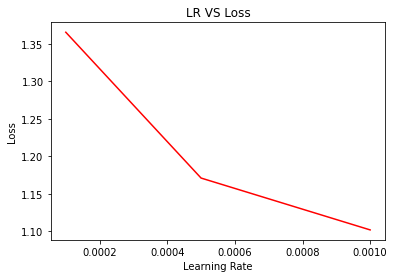

In [15]:
import matplotlib.pyplot as plt

plt.plot(learning_rate,loss,'r')
plt.title("LR VS Loss")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.show()

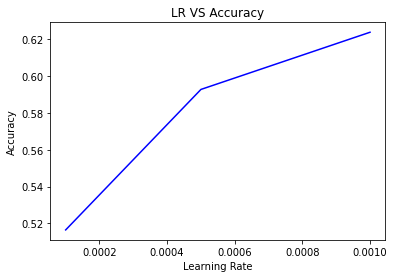

In [16]:
plt.plot(learning_rate,accuracy,'b')
plt.title("LR VS Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.show()

# **2. What is the effect of batch size on the training process? Which performed best?**

In [17]:
batches = [500,1000,5000,10000]
loss = []
accuracy = []
Net = Lenet()
Net.build()
for bat in batches:
    Net.re_intialize()
    Net.fit(X,y,Epochs= 25,lr= 0.005, batch= bat,x_val= X_test,y_val=y_test)
    l,a = Net.evaluate(X_test,y_test)
    loss.append(l)
    accuracy.append(a)

Epoch 1/25
 95/100 [===========================>..] - ETA: 0s - loss: 1.7515 - accuracy: 0.3550

100/100 [==============================] - 2s 14ms/step - loss: 1.7390 - accuracy: 0.3603 - val_loss: 1.4956 - val_accuracy: 0.4485 - lr: 0.0050
Epoch 2/25
 96/100 [===========================>..] - ETA: 0s - loss: 1.4126 - accuracy: 0.4899

100/100 [==============================] - 1s 10ms/step - loss: 1.4088 - accuracy: 0.4913 - val_loss: 1.3346 - val_accuracy: 0.5174 - lr: 0.0050
Epoch 3/25
 95/100 [===========================>..] - ETA: 0s - loss: 1.2901 - accuracy: 0.5361

100/100 [==============================] - 1s 11ms/step - loss: 1.2883 - accuracy: 0.5367 - val_loss: 1.2963 - val_accuracy: 0.5398 - lr: 0.0050
Epoch 4/25
 96/100 [===========================>..] - ETA: 0s - loss: 1.2000 - accuracy: 0.5721

100/100 [==============================] - 1s 10ms/step - loss: 1.1990 - accuracy: 0.5726 - val_loss: 1.2061 - val_accuracy: 0.5705 - lr: 0.0050
Epoch 5/25
 96/100 [===========================>..] - ETA: 0s - loss: 1.1405 - accuracy: 0.5967

100/100 [==============================] - 1s 10ms/step - loss: 1.1395 - accuracy: 0.5972 - val_loss: 1.1817 - val_accuracy: 0.5752 - lr: 0.0050
Epoch 6/25
 95/100 [===========================>..] - ETA: 0s - loss: 1.0756 - accuracy: 0.6205

100/100 [==============================] - 1s 11ms/step - loss: 1.0759 - accuracy: 0.6207 - val_loss: 1.1209 - val_accuracy: 0.6027 - lr: 0.0050
Epoch 7/25
 96/100 [===========================>..] - ETA: 0s - loss: 1.0198 - accuracy: 0.6391

100/100 [==============================] - 1s 11ms/step - loss: 1.0197 - accuracy: 0.6393 - val_loss: 1.1525 - val_accuracy: 0.5952 - lr: 0.0050
Epoch 8/25
 97/100 [============================>.] - ETA: 0s - loss: 0.9883 - accuracy: 0.6500

100/100 [==============================] - 1s 11ms/step - loss: 0.9884 - accuracy: 0.6502 - val_loss: 1.1064 - val_accuracy: 0.6107 - lr: 0.0050
Epoch 9/25
 95/100 [===========================>..] - ETA: 0s - loss: 0.9626 - accuracy: 0.6619

100/100 [==============================] - 1s 11ms/step - loss: 0.9607 - accuracy: 0.6629 - val_loss: 1.0981 - val_accuracy: 0.6177 - lr: 0.0050
Epoch 10/25
 96/100 [===========================>..] - ETA: 0s - loss: 0.9449 - accuracy: 0.6667

100/100 [==============================] - 1s 11ms/step - loss: 0.9448 - accuracy: 0.6664 - val_loss: 1.1195 - val_accuracy: 0.6045 - lr: 0.0050
Epoch 11/25
 97/100 [============================>.] - ETA: 0s - loss: 0.9173 - accuracy: 0.6760

100/100 [==============================] - 1s 11ms/step - loss: 0.9182 - accuracy: 0.6757 - val_loss: 1.0958 - val_accuracy: 0.6184 - lr: 0.0050
Epoch 12/25
 95/100 [===========================>..] - ETA: 0s - loss: 0.8940 - accuracy: 0.6868

100/100 [==============================] - 1s 11ms/step - loss: 0.8971 - accuracy: 0.6852 - val_loss: 1.1712 - val_accuracy: 0.6003 - lr: 0.0050
Epoch 13/25
 97/100 [============================>.] - ETA: 0s - loss: 0.8771 - accuracy: 0.6909

100/100 [==============================] - 1s 10ms/step - loss: 0.8773 - accuracy: 0.6907 - val_loss: 1.1208 - val_accuracy: 0.6218 - lr: 0.0050
Epoch 14/25
 97/100 [============================>.] - ETA: 0s - loss: 0.8619 - accuracy: 0.6970

100/100 [==============================] - 1s 10ms/step - loss: 0.8627 - accuracy: 0.6965 - val_loss: 1.1975 - val_accuracy: 0.5969 - lr: 0.0050
Epoch 15/25
 96/100 [===========================>..] - ETA: 0s - loss: 0.8328 - accuracy: 0.7051

100/100 [==============================] - 1s 10ms/step - loss: 0.8341 - accuracy: 0.7044 - val_loss: 1.1269 - val_accuracy: 0.6191 - lr: 0.0050
Epoch 16/25
100/100 [==============================] - ETA: 0s - loss: 0.8008 - accuracy: 0.7164

100/100 [==============================] - 1s 11ms/step - loss: 0.8008 - accuracy: 0.7164 - val_loss: 1.1494 - val_accuracy: 0.6168 - lr: 0.0050
Epoch 17/25
 97/100 [============================>.] - ETA: 0s - loss: 0.8008 - accuracy: 0.7182

100/100 [==============================] - 1s 10ms/step - loss: 0.8000 - accuracy: 0.7184 - val_loss: 1.1472 - val_accuracy: 0.6202 - lr: 0.0050
Epoch 18/25
100/100 [==============================] - ETA: 0s - loss: 0.7808 - accuracy: 0.7219

100/100 [==============================] - 1s 10ms/step - loss: 0.7808 - accuracy: 0.7219 - val_loss: 1.1937 - val_accuracy: 0.6076 - lr: 0.0050
Epoch 19/25
 96/100 [===========================>..] - ETA: 0s - loss: 0.7604 - accuracy: 0.7301

100/100 [==============================] - 1s 10ms/step - loss: 0.7604 - accuracy: 0.7299 - val_loss: 1.1929 - val_accuracy: 0.6099 - lr: 0.0050
Epoch 20/25
 95/100 [===========================>..] - ETA: 0s - loss: 0.7418 - accuracy: 0.7358

100/100 [==============================] - 1s 10ms/step - loss: 0.7422 - accuracy: 0.7358 - val_loss: 1.1951 - val_accuracy: 0.6183 - lr: 0.0050
Epoch 21/25
 96/100 [===========================>..] - ETA: 0s - loss: 0.7322 - accuracy: 0.7402

100/100 [==============================] - 1s 10ms/step - loss: 0.7334 - accuracy: 0.7396 - val_loss: 1.1871 - val_accuracy: 0.6181 - lr: 0.0050
Epoch 22/25
 96/100 [===========================>..] - ETA: 0s - loss: 0.7225 - accuracy: 0.7421

100/100 [==============================] - 1s 10ms/step - loss: 0.7231 - accuracy: 0.7422 - val_loss: 1.2159 - val_accuracy: 0.6127 - lr: 0.0050
Epoch 23/25
 95/100 [===========================>..] - ETA: 0s - loss: 0.7187 - accuracy: 0.7452

100/100 [==============================] - 1s 10ms/step - loss: 0.7205 - accuracy: 0.7443 - val_loss: 1.2308 - val_accuracy: 0.6131 - lr: 0.0050
Epoch 24/25
 96/100 [===========================>..] - ETA: 0s - loss: 0.6936 - accuracy: 0.7525

100/100 [==============================] - 1s 10ms/step - loss: 0.6955 - accuracy: 0.7521 - val_loss: 1.2748 - val_accuracy: 0.6104 - lr: 0.0050
Epoch 25/25
 96/100 [===========================>..] - ETA: 0s - loss: 0.6839 - accuracy: 0.7570

313/313 [==============================] - 1s 3ms/step - loss: 1.2793 - accuracy: 0.6169
Epoch 1/25
50/50 [==============================] - ETA: 0s - loss: 1.8335 - accuracy: 0.3277

50/50 [==============================] - 2s 26ms/step - loss: 1.8335 - accuracy: 0.3277 - val_loss: 1.5487 - val_accuracy: 0.4332 - lr: 0.0050
Epoch 2/25
48/50 [===========================>..] - ETA: 0s - loss: 1.4737 - accuracy: 0.4611

50/50 [==============================] - 1s 18ms/step - loss: 1.4701 - accuracy: 0.4626 - val_loss: 1.4048 - val_accuracy: 0.4864 - lr: 0.0050
Epoch 3/25
49/50 [============================>.] - ETA: 0s - loss: 1.3504 - accuracy: 0.5115

50/50 [==============================] - 1s 17ms/step - loss: 1.3491 - accuracy: 0.5120 - val_loss: 1.3178 - val_accuracy: 0.5256 - lr: 0.0050
Epoch 4/25
49/50 [============================>.] - ETA: 0s - loss: 1.2608 - accuracy: 0.5463

50/50 [==============================] - 1s 19ms/step - loss: 1.2613 - accuracy: 0.5461 - val_loss: 1.2497 - val_accuracy: 0.5513 - lr: 0.0050
Epoch 5/25
48/50 [===========================>..] - ETA: 0s - loss: 1.2003 - accuracy: 0.5701

50/50 [==============================] - 1s 19ms/step - loss: 1.2005 - accuracy: 0.5702 - val_loss: 1.2237 - val_accuracy: 0.5614 - lr: 0.0050
Epoch 6/25
48/50 [===========================>..] - ETA: 0s - loss: 1.1520 - accuracy: 0.5888

50/50 [==============================] - 1s 18ms/step - loss: 1.1537 - accuracy: 0.5882 - val_loss: 1.1921 - val_accuracy: 0.5796 - lr: 0.0050
Epoch 7/25
50/50 [==============================] - ETA: 0s - loss: 1.1000 - accuracy: 0.6095

50/50 [==============================] - 1s 18ms/step - loss: 1.1000 - accuracy: 0.6095 - val_loss: 1.1626 - val_accuracy: 0.5913 - lr: 0.0050
Epoch 8/25
47/50 [===========================>..] - ETA: 0s - loss: 1.0672 - accuracy: 0.6211

50/50 [==============================] - 1s 18ms/step - loss: 1.0656 - accuracy: 0.6218 - val_loss: 1.1465 - val_accuracy: 0.5912 - lr: 0.0050
Epoch 9/25
48/50 [===========================>..] - ETA: 0s - loss: 1.0380 - accuracy: 0.6291

50/50 [==============================] - 1s 17ms/step - loss: 1.0386 - accuracy: 0.6287 - val_loss: 1.1206 - val_accuracy: 0.6018 - lr: 0.0050
Epoch 10/25
48/50 [===========================>..] - ETA: 0s - loss: 1.0152 - accuracy: 0.6398

50/50 [==============================] - 1s 18ms/step - loss: 1.0149 - accuracy: 0.6399 - val_loss: 1.1274 - val_accuracy: 0.5997 - lr: 0.0050
Epoch 11/25
48/50 [===========================>..] - ETA: 0s - loss: 0.9790 - accuracy: 0.6520

50/50 [==============================] - 1s 18ms/step - loss: 0.9793 - accuracy: 0.6517 - val_loss: 1.1168 - val_accuracy: 0.6096 - lr: 0.0050
Epoch 12/25
47/50 [===========================>..] - ETA: 0s - loss: 0.9417 - accuracy: 0.6640

50/50 [==============================] - 1s 18ms/step - loss: 0.9441 - accuracy: 0.6629 - val_loss: 1.1153 - val_accuracy: 0.6058 - lr: 0.0050
Epoch 13/25
47/50 [===========================>..] - ETA: 0s - loss: 0.9284 - accuracy: 0.6712

50/50 [==============================] - 1s 17ms/step - loss: 0.9288 - accuracy: 0.6709 - val_loss: 1.1196 - val_accuracy: 0.6113 - lr: 0.0050
Epoch 14/25
49/50 [============================>.] - ETA: 0s - loss: 0.8966 - accuracy: 0.6820

50/50 [==============================] - 1s 19ms/step - loss: 0.8970 - accuracy: 0.6819 - val_loss: 1.1108 - val_accuracy: 0.6153 - lr: 0.0050
Epoch 15/25
49/50 [============================>.] - ETA: 0s - loss: 0.8824 - accuracy: 0.6860

50/50 [==============================] - 1s 18ms/step - loss: 0.8829 - accuracy: 0.6859 - val_loss: 1.1320 - val_accuracy: 0.6109 - lr: 0.0050
Epoch 16/25
47/50 [===========================>..] - ETA: 0s - loss: 0.8579 - accuracy: 0.6970

50/50 [==============================] - 1s 18ms/step - loss: 0.8571 - accuracy: 0.6970 - val_loss: 1.1463 - val_accuracy: 0.6119 - lr: 0.0050
Epoch 17/25
47/50 [===========================>..] - ETA: 0s - loss: 0.8361 - accuracy: 0.7033

50/50 [==============================] - 1s 18ms/step - loss: 0.8387 - accuracy: 0.7025 - val_loss: 1.1503 - val_accuracy: 0.6066 - lr: 0.0050
Epoch 18/25
47/50 [===========================>..] - ETA: 0s - loss: 0.8187 - accuracy: 0.7081

50/50 [==============================] - 1s 18ms/step - loss: 0.8208 - accuracy: 0.7079 - val_loss: 1.1617 - val_accuracy: 0.6091 - lr: 0.0050
Epoch 19/25
48/50 [===========================>..] - ETA: 0s - loss: 0.8144 - accuracy: 0.7101

50/50 [==============================] - 1s 17ms/step - loss: 0.8160 - accuracy: 0.7098 - val_loss: 1.1547 - val_accuracy: 0.6073 - lr: 0.0050
Epoch 20/25
49/50 [============================>.] - ETA: 0s - loss: 0.7885 - accuracy: 0.7208

50/50 [==============================] - 1s 17ms/step - loss: 0.7890 - accuracy: 0.7203 - val_loss: 1.1658 - val_accuracy: 0.6087 - lr: 0.0050
Epoch 21/25
50/50 [==============================] - ETA: 0s - loss: 0.7629 - accuracy: 0.7291

50/50 [==============================] - 1s 18ms/step - loss: 0.7629 - accuracy: 0.7291 - val_loss: 1.1926 - val_accuracy: 0.6127 - lr: 0.0050
Epoch 22/25
48/50 [===========================>..] - ETA: 0s - loss: 0.7620 - accuracy: 0.7290

50/50 [==============================] - 1s 18ms/step - loss: 0.7633 - accuracy: 0.7282 - val_loss: 1.1955 - val_accuracy: 0.6083 - lr: 0.0050
Epoch 23/25
49/50 [============================>.] - ETA: 0s - loss: 0.7443 - accuracy: 0.7341

50/50 [==============================] - 1s 17ms/step - loss: 0.7450 - accuracy: 0.7338 - val_loss: 1.2052 - val_accuracy: 0.6127 - lr: 0.0050
Epoch 24/25
47/50 [===========================>..] - ETA: 0s - loss: 0.7294 - accuracy: 0.7402

50/50 [==============================] - 1s 18ms/step - loss: 0.7307 - accuracy: 0.7394 - val_loss: 1.2354 - val_accuracy: 0.6017 - lr: 0.0050
Epoch 25/25
47/50 [===========================>..] - ETA: 0s - loss: 0.7326 - accuracy: 0.7377

313/313 [==============================] - 1s 3ms/step - loss: 1.2368 - accuracy: 0.6081
Epoch 1/25
10/10 [==============================] - ETA: 0s - loss: 2.1132 - accuracy: 0.2118

10/10 [==============================] - 3s 114ms/step - loss: 2.1132 - accuracy: 0.2118 - val_loss: 1.9233 - val_accuracy: 0.2875 - lr: 0.0050
Epoch 2/25
10/10 [==============================] - ETA: 0s - loss: 1.8313 - accuracy: 0.3318

10/10 [==============================] - 1s 85ms/step - loss: 1.8313 - accuracy: 0.3318 - val_loss: 1.6928 - val_accuracy: 0.3848 - lr: 0.0050
Epoch 3/25
10/10 [==============================] - ETA: 0s - loss: 1.6562 - accuracy: 0.4027

10/10 [==============================] - 1s 79ms/step - loss: 1.6562 - accuracy: 0.4027 - val_loss: 1.6147 - val_accuracy: 0.4143 - lr: 0.0050
Epoch 4/25
10/10 [==============================] - ETA: 0s - loss: 1.5550 - accuracy: 0.4380

10/10 [==============================] - 1s 85ms/step - loss: 1.5550 - accuracy: 0.4380 - val_loss: 1.5106 - val_accuracy: 0.4545 - lr: 0.0050
Epoch 5/25
10/10 [==============================] - ETA: 0s - loss: 1.4706 - accuracy: 0.4709

10/10 [==============================] - 1s 78ms/step - loss: 1.4706 - accuracy: 0.4709 - val_loss: 1.4472 - val_accuracy: 0.4806 - lr: 0.0050
Epoch 6/25
10/10 [==============================] - ETA: 0s - loss: 1.4226 - accuracy: 0.4904

10/10 [==============================] - 1s 79ms/step - loss: 1.4226 - accuracy: 0.4904 - val_loss: 1.3920 - val_accuracy: 0.4981 - lr: 0.0050
Epoch 7/25
10/10 [==============================] - ETA: 0s - loss: 1.3733 - accuracy: 0.5099

10/10 [==============================] - 1s 86ms/step - loss: 1.3733 - accuracy: 0.5099 - val_loss: 1.3672 - val_accuracy: 0.5105 - lr: 0.0050
Epoch 8/25
10/10 [==============================] - ETA: 0s - loss: 1.3164 - accuracy: 0.5323

10/10 [==============================] - 1s 85ms/step - loss: 1.3164 - accuracy: 0.5323 - val_loss: 1.3341 - val_accuracy: 0.5213 - lr: 0.0050
Epoch 9/25
10/10 [==============================] - ETA: 0s - loss: 1.2715 - accuracy: 0.5478

10/10 [==============================] - 1s 86ms/step - loss: 1.2715 - accuracy: 0.5478 - val_loss: 1.3051 - val_accuracy: 0.5377 - lr: 0.0050
Epoch 10/25
10/10 [==============================] - ETA: 0s - loss: 1.2420 - accuracy: 0.5619

10/10 [==============================] - 1s 84ms/step - loss: 1.2420 - accuracy: 0.5619 - val_loss: 1.3058 - val_accuracy: 0.5371 - lr: 0.0050
Epoch 11/25
10/10 [==============================] - ETA: 0s - loss: 1.2199 - accuracy: 0.5683

10/10 [==============================] - 1s 86ms/step - loss: 1.2199 - accuracy: 0.5683 - val_loss: 1.2646 - val_accuracy: 0.5555 - lr: 0.0050
Epoch 12/25
10/10 [==============================] - ETA: 0s - loss: 1.1946 - accuracy: 0.5799

10/10 [==============================] - 1s 85ms/step - loss: 1.1946 - accuracy: 0.5799 - val_loss: 1.2501 - val_accuracy: 0.5572 - lr: 0.0050
Epoch 13/25
10/10 [==============================] - ETA: 0s - loss: 1.1668 - accuracy: 0.5897

10/10 [==============================] - 1s 86ms/step - loss: 1.1668 - accuracy: 0.5897 - val_loss: 1.2154 - val_accuracy: 0.5715 - lr: 0.0050
Epoch 14/25
10/10 [==============================] - ETA: 0s - loss: 1.1313 - accuracy: 0.6031

10/10 [==============================] - 1s 78ms/step - loss: 1.1313 - accuracy: 0.6031 - val_loss: 1.2198 - val_accuracy: 0.5741 - lr: 0.0050
Epoch 15/25
10/10 [==============================] - ETA: 0s - loss: 1.1117 - accuracy: 0.6085

10/10 [==============================] - 1s 79ms/step - loss: 1.1117 - accuracy: 0.6085 - val_loss: 1.2178 - val_accuracy: 0.5746 - lr: 0.0050
Epoch 16/25
10/10 [==============================] - ETA: 0s - loss: 1.0988 - accuracy: 0.6135

10/10 [==============================] - 1s 80ms/step - loss: 1.0988 - accuracy: 0.6135 - val_loss: 1.1933 - val_accuracy: 0.5767 - lr: 0.0050
Epoch 17/25
10/10 [==============================] - ETA: 0s - loss: 1.0755 - accuracy: 0.6223

10/10 [==============================] - 1s 80ms/step - loss: 1.0755 - accuracy: 0.6223 - val_loss: 1.1815 - val_accuracy: 0.5854 - lr: 0.0050
Epoch 18/25
10/10 [==============================] - ETA: 0s - loss: 1.0562 - accuracy: 0.6286

10/10 [==============================] - 1s 85ms/step - loss: 1.0562 - accuracy: 0.6286 - val_loss: 1.1673 - val_accuracy: 0.5895 - lr: 0.0050
Epoch 19/25
10/10 [==============================] - ETA: 0s - loss: 1.0397 - accuracy: 0.6347

10/10 [==============================] - 1s 86ms/step - loss: 1.0397 - accuracy: 0.6347 - val_loss: 1.1737 - val_accuracy: 0.5912 - lr: 0.0050
Epoch 20/25
10/10 [==============================] - ETA: 0s - loss: 1.0158 - accuracy: 0.6417

10/10 [==============================] - 1s 84ms/step - loss: 1.0158 - accuracy: 0.6417 - val_loss: 1.1803 - val_accuracy: 0.5876 - lr: 0.0050
Epoch 21/25
10/10 [==============================] - ETA: 0s - loss: 1.0096 - accuracy: 0.6454

10/10 [==============================] - 1s 85ms/step - loss: 1.0096 - accuracy: 0.6454 - val_loss: 1.1404 - val_accuracy: 0.5982 - lr: 0.0050
Epoch 22/25
10/10 [==============================] - ETA: 0s - loss: 0.9863 - accuracy: 0.6545

10/10 [==============================] - 1s 85ms/step - loss: 0.9863 - accuracy: 0.6545 - val_loss: 1.1644 - val_accuracy: 0.5953 - lr: 0.0050
Epoch 23/25
10/10 [==============================] - ETA: 0s - loss: 0.9638 - accuracy: 0.6641

10/10 [==============================] - 1s 78ms/step - loss: 0.9638 - accuracy: 0.6641 - val_loss: 1.1285 - val_accuracy: 0.6074 - lr: 0.0050
Epoch 24/25
10/10 [==============================] - ETA: 0s - loss: 0.9673 - accuracy: 0.6604

10/10 [==============================] - 1s 85ms/step - loss: 0.9673 - accuracy: 0.6604 - val_loss: 1.1501 - val_accuracy: 0.5965 - lr: 0.0050
Epoch 25/25
10/10 [==============================] - ETA: 0s - loss: 0.9504 - accuracy: 0.6666

313/313 [==============================] - 1s 3ms/step - loss: 1.1409 - accuracy: 0.6027
Epoch 1/25
5/5 [==============================] - ETA: 0s - loss: 2.2030 - accuracy: 0.1784

5/5 [==============================] - 4s 236ms/step - loss: 2.2030 - accuracy: 0.1784 - val_loss: 2.0674 - val_accuracy: 0.2448 - lr: 0.0050
Epoch 2/25
5/5 [==============================] - ETA: 0s - loss: 1.9915 - accuracy: 0.2755

5/5 [==============================] - 1s 160ms/step - loss: 1.9915 - accuracy: 0.2755 - val_loss: 1.9035 - val_accuracy: 0.3086 - lr: 0.0050
Epoch 3/25
5/5 [==============================] - ETA: 0s - loss: 1.8540 - accuracy: 0.3235

5/5 [==============================] - 1s 176ms/step - loss: 1.8540 - accuracy: 0.3235 - val_loss: 1.7820 - val_accuracy: 0.3599 - lr: 0.0050
Epoch 4/25
5/5 [==============================] - ETA: 0s - loss: 1.7360 - accuracy: 0.3701

5/5 [==============================] - 1s 175ms/step - loss: 1.7360 - accuracy: 0.3701 - val_loss: 1.6929 - val_accuracy: 0.3880 - lr: 0.0050
Epoch 5/25
5/5 [==============================] - ETA: 0s - loss: 1.6619 - accuracy: 0.4003

5/5 [==============================] - 1s 175ms/step - loss: 1.6619 - accuracy: 0.4003 - val_loss: 1.6173 - val_accuracy: 0.4099 - lr: 0.0050
Epoch 6/25
5/5 [==============================] - ETA: 0s - loss: 1.5875 - accuracy: 0.4288

5/5 [==============================] - 1s 173ms/step - loss: 1.5875 - accuracy: 0.4288 - val_loss: 1.5596 - val_accuracy: 0.4372 - lr: 0.0050
Epoch 7/25
5/5 [==============================] - ETA: 0s - loss: 1.5261 - accuracy: 0.4517

5/5 [==============================] - 1s 177ms/step - loss: 1.5261 - accuracy: 0.4517 - val_loss: 1.4979 - val_accuracy: 0.4572 - lr: 0.0050
Epoch 8/25
5/5 [==============================] - ETA: 0s - loss: 1.4732 - accuracy: 0.4717

5/5 [==============================] - 1s 174ms/step - loss: 1.4732 - accuracy: 0.4717 - val_loss: 1.4517 - val_accuracy: 0.4799 - lr: 0.0050
Epoch 9/25
5/5 [==============================] - ETA: 0s - loss: 1.4284 - accuracy: 0.4885

5/5 [==============================] - 1s 162ms/step - loss: 1.4284 - accuracy: 0.4885 - val_loss: 1.4254 - val_accuracy: 0.4886 - lr: 0.0050
Epoch 10/25
5/5 [==============================] - ETA: 0s - loss: 1.3939 - accuracy: 0.5029

5/5 [==============================] - 1s 159ms/step - loss: 1.3939 - accuracy: 0.5029 - val_loss: 1.3954 - val_accuracy: 0.5024 - lr: 0.0050
Epoch 11/25
5/5 [==============================] - ETA: 0s - loss: 1.3706 - accuracy: 0.5102

5/5 [==============================] - 1s 163ms/step - loss: 1.3706 - accuracy: 0.5102 - val_loss: 1.3697 - val_accuracy: 0.5086 - lr: 0.0050
Epoch 12/25
5/5 [==============================] - ETA: 0s - loss: 1.3396 - accuracy: 0.5220

5/5 [==============================] - 1s 156ms/step - loss: 1.3396 - accuracy: 0.5220 - val_loss: 1.3416 - val_accuracy: 0.5211 - lr: 0.0050
Epoch 13/25
5/5 [==============================] - ETA: 0s - loss: 1.3084 - accuracy: 0.5339

5/5 [==============================] - 1s 170ms/step - loss: 1.3084 - accuracy: 0.5339 - val_loss: 1.3327 - val_accuracy: 0.5299 - lr: 0.0050
Epoch 14/25
5/5 [==============================] - ETA: 0s - loss: 1.2900 - accuracy: 0.5396

5/5 [==============================] - 1s 174ms/step - loss: 1.2900 - accuracy: 0.5396 - val_loss: 1.3351 - val_accuracy: 0.5207 - lr: 0.0050
Epoch 15/25
5/5 [==============================] - ETA: 0s - loss: 1.3103 - accuracy: 0.5351

5/5 [==============================] - 1s 159ms/step - loss: 1.3103 - accuracy: 0.5351 - val_loss: 1.3664 - val_accuracy: 0.5126 - lr: 0.0050
Epoch 16/25
5/5 [==============================] - ETA: 0s - loss: 1.2818 - accuracy: 0.5452

5/5 [==============================] - 1s 156ms/step - loss: 1.2818 - accuracy: 0.5452 - val_loss: 1.3245 - val_accuracy: 0.5300 - lr: 0.0050
Epoch 17/25
5/5 [==============================] - ETA: 0s - loss: 1.2434 - accuracy: 0.5581

5/5 [==============================] - 1s 165ms/step - loss: 1.2434 - accuracy: 0.5581 - val_loss: 1.2834 - val_accuracy: 0.5410 - lr: 0.0050
Epoch 18/25
5/5 [==============================] - ETA: 0s - loss: 1.2132 - accuracy: 0.5707

5/5 [==============================] - 1s 162ms/step - loss: 1.2132 - accuracy: 0.5707 - val_loss: 1.2529 - val_accuracy: 0.5520 - lr: 0.0050
Epoch 19/25
5/5 [==============================] - ETA: 0s - loss: 1.1838 - accuracy: 0.5808

5/5 [==============================] - 1s 179ms/step - loss: 1.1838 - accuracy: 0.5808 - val_loss: 1.2367 - val_accuracy: 0.5615 - lr: 0.0050
Epoch 20/25
5/5 [==============================] - ETA: 0s - loss: 1.1616 - accuracy: 0.5914

5/5 [==============================] - 1s 174ms/step - loss: 1.1616 - accuracy: 0.5914 - val_loss: 1.2317 - val_accuracy: 0.5594 - lr: 0.0050
Epoch 21/25
5/5 [==============================] - ETA: 0s - loss: 1.1539 - accuracy: 0.5937

5/5 [==============================] - 1s 173ms/step - loss: 1.1539 - accuracy: 0.5937 - val_loss: 1.2695 - val_accuracy: 0.5546 - lr: 0.0050
Epoch 22/25
5/5 [==============================] - ETA: 0s - loss: 1.1836 - accuracy: 0.5827

5/5 [==============================] - 1s 178ms/step - loss: 1.1836 - accuracy: 0.5827 - val_loss: 1.2244 - val_accuracy: 0.5693 - lr: 0.0050
Epoch 23/25
5/5 [==============================] - ETA: 0s - loss: 1.1464 - accuracy: 0.5954

5/5 [==============================] - 1s 164ms/step - loss: 1.1464 - accuracy: 0.5954 - val_loss: 1.2103 - val_accuracy: 0.5739 - lr: 0.0050
Epoch 24/25
5/5 [==============================] - ETA: 0s - loss: 1.1149 - accuracy: 0.6099

5/5 [==============================] - 1s 161ms/step - loss: 1.1149 - accuracy: 0.6099 - val_loss: 1.1928 - val_accuracy: 0.5814 - lr: 0.0050
Epoch 25/25
5/5 [==============================] - ETA: 0s - loss: 1.0912 - accuracy: 0.6163

313/313 [==============================] - 1s 3ms/step - loss: 1.1920 - accuracy: 0.5816


In [18]:
df = pd.DataFrame([])
df['Batch'] = batches
df['Loss'] = loss
df['Accuracy'] = accuracy

In [19]:
df

,Batch,Loss,Accuracy
0,500,1.279321,0.6169
1,1000,1.236831,0.6081
2,5000,1.140879,0.6027
3,10000,1.191983,0.5816


For above we can see that highest accuracy is reached for batch size of 500

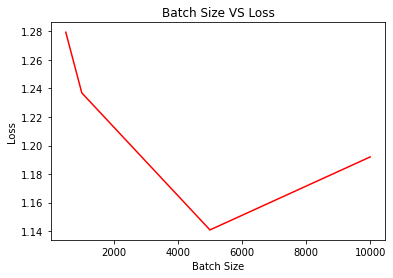

In [20]:
plt.plot(batches,loss,'r')
plt.title("Batch Size VS Loss")
plt.xlabel("Batch Size")
plt.ylabel("Loss")
plt.show()

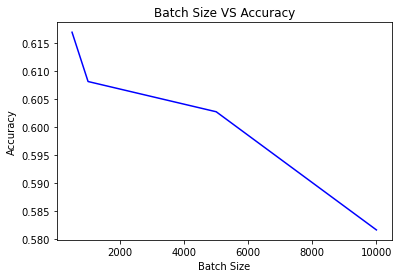

In [21]:
plt.plot(batches,accuracy,'b')
plt.title("Batch Size VS Accuracy")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy")
plt.show()

# **3. Try different hyperparameters to obtain the best accuracy on the test set. What is your best performance and what were the hyperparameters?**

The best learning rate that we can find from above experiment is 0.001 and the best batch size would be 500. Therefore we consyruct a model using this optimized hyperparameter. 

In [23]:
Net = Lenet()
Net.build()
Net.fit(X,y,Epochs= 50,lr= 0.001, batch= 500,x_val= X_test,y_val=y_test)
l,a = Net.evaluate(X_test,y_test)

Epoch 1/50
 96/100 [===========================>..] - ETA: 0s - loss: 1.8253 - accuracy: 0.3420

100/100 [==============================] - 2s 19ms/step - loss: 1.8128 - accuracy: 0.3467 - val_loss: 1.5561 - val_accuracy: 0.4358 - lr: 0.0010
Epoch 2/50
 99/100 [============================>.] - ETA: 0s - loss: 1.4930 - accuracy: 0.4651

100/100 [==============================] - 1s 10ms/step - loss: 1.4923 - accuracy: 0.4652 - val_loss: 1.4411 - val_accuracy: 0.4830 - lr: 0.0010
Epoch 3/50
 96/100 [===========================>..] - ETA: 0s - loss: 1.3872 - accuracy: 0.5061

100/100 [==============================] - 1s 11ms/step - loss: 1.3856 - accuracy: 0.5063 - val_loss: 1.3506 - val_accuracy: 0.5178 - lr: 0.0010
Epoch 4/50
 96/100 [===========================>..] - ETA: 0s - loss: 1.3070 - accuracy: 0.5361

100/100 [==============================] - 1s 11ms/step - loss: 1.3053 - accuracy: 0.5363 - val_loss: 1.2908 - val_accuracy: 0.5371 - lr: 0.0010
Epoch 5/50
 97/100 [============================>.] - ETA: 0s - loss: 1.2475 - accuracy: 0.5577

100/100 [==============================] - 1s 11ms/step - loss: 1.2482 - accuracy: 0.5577 - val_loss: 1.2697 - val_accuracy: 0.5441 - lr: 0.0010
Epoch 6/50
 95/100 [===========================>..] - ETA: 0s - loss: 1.2012 - accuracy: 0.5770

100/100 [==============================] - 1s 10ms/step - loss: 1.2007 - accuracy: 0.5771 - val_loss: 1.2382 - val_accuracy: 0.5565 - lr: 0.0010
Epoch 7/50
 96/100 [===========================>..] - ETA: 0s - loss: 1.1657 - accuracy: 0.5898

100/100 [==============================] - 1s 10ms/step - loss: 1.1651 - accuracy: 0.5895 - val_loss: 1.1916 - val_accuracy: 0.5751 - lr: 0.0010
Epoch 8/50
 97/100 [============================>.] - ETA: 0s - loss: 1.1269 - accuracy: 0.6025

100/100 [==============================] - 1s 11ms/step - loss: 1.1266 - accuracy: 0.6027 - val_loss: 1.1773 - val_accuracy: 0.5812 - lr: 0.0010
Epoch 9/50
 99/100 [============================>.] - ETA: 0s - loss: 1.0985 - accuracy: 0.6139

100/100 [==============================] - 1s 11ms/step - loss: 1.0977 - accuracy: 0.6144 - val_loss: 1.1744 - val_accuracy: 0.5812 - lr: 0.0010
Epoch 10/50
 95/100 [===========================>..] - ETA: 0s - loss: 1.0680 - accuracy: 0.6243

100/100 [==============================] - 1s 10ms/step - loss: 1.0676 - accuracy: 0.6239 - val_loss: 1.1537 - val_accuracy: 0.5891 - lr: 0.0010
Epoch 11/50
 99/100 [============================>.] - ETA: 0s - loss: 1.0445 - accuracy: 0.6335

100/100 [==============================] - 1s 11ms/step - loss: 1.0448 - accuracy: 0.6335 - val_loss: 1.1227 - val_accuracy: 0.6041 - lr: 0.0010
Epoch 12/50
 96/100 [===========================>..] - ETA: 0s - loss: 1.0191 - accuracy: 0.6441

100/100 [==============================] - 1s 10ms/step - loss: 1.0195 - accuracy: 0.6442 - val_loss: 1.1384 - val_accuracy: 0.6025 - lr: 0.0010
Epoch 13/50
 96/100 [===========================>..] - ETA: 0s - loss: 1.0016 - accuracy: 0.6492

100/100 [==============================] - 1s 10ms/step - loss: 1.0015 - accuracy: 0.6488 - val_loss: 1.1454 - val_accuracy: 0.5914 - lr: 0.0010
Epoch 14/50
100/100 [==============================] - ETA: 0s - loss: 0.9844 - accuracy: 0.6537

100/100 [==============================] - 1s 10ms/step - loss: 0.9844 - accuracy: 0.6537 - val_loss: 1.1062 - val_accuracy: 0.6124 - lr: 0.0010
Epoch 15/50
 95/100 [===========================>..] - ETA: 0s - loss: 0.9573 - accuracy: 0.6639

100/100 [==============================] - 1s 11ms/step - loss: 0.9591 - accuracy: 0.6635 - val_loss: 1.1174 - val_accuracy: 0.6131 - lr: 0.0010
Epoch 16/50
 97/100 [============================>.] - ETA: 0s - loss: 0.9448 - accuracy: 0.6690

100/100 [==============================] - 1s 11ms/step - loss: 0.9464 - accuracy: 0.6683 - val_loss: 1.0961 - val_accuracy: 0.6156 - lr: 0.0010
Epoch 17/50
 95/100 [===========================>..] - ETA: 0s - loss: 0.9175 - accuracy: 0.6791

100/100 [==============================] - 1s 11ms/step - loss: 0.9196 - accuracy: 0.6780 - val_loss: 1.0871 - val_accuracy: 0.6164 - lr: 0.0010
Epoch 18/50
 98/100 [============================>.] - ETA: 0s - loss: 0.9116 - accuracy: 0.6806

100/100 [==============================] - 1s 13ms/step - loss: 0.9116 - accuracy: 0.6806 - val_loss: 1.0725 - val_accuracy: 0.6262 - lr: 0.0010
Epoch 19/50
 96/100 [===========================>..] - ETA: 0s - loss: 0.8839 - accuracy: 0.6904

100/100 [==============================] - 1s 13ms/step - loss: 0.8830 - accuracy: 0.6905 - val_loss: 1.0758 - val_accuracy: 0.6284 - lr: 0.0010
Epoch 20/50
 97/100 [============================>.] - ETA: 0s - loss: 0.8691 - accuracy: 0.6947

100/100 [==============================] - 2s 16ms/step - loss: 0.8709 - accuracy: 0.6942 - val_loss: 1.0788 - val_accuracy: 0.6280 - lr: 0.0010
Epoch 21/50
 98/100 [============================>.] - ETA: 0s - loss: 0.8596 - accuracy: 0.6968

100/100 [==============================] - 1s 12ms/step - loss: 0.8588 - accuracy: 0.6972 - val_loss: 1.0827 - val_accuracy: 0.6263 - lr: 0.0010
Epoch 22/50
100/100 [==============================] - ETA: 0s - loss: 0.8405 - accuracy: 0.7041

100/100 [==============================] - 1s 10ms/step - loss: 0.8405 - accuracy: 0.7041 - val_loss: 1.0680 - val_accuracy: 0.6379 - lr: 0.0010
Epoch 23/50
 96/100 [===========================>..] - ETA: 0s - loss: 0.8257 - accuracy: 0.7098

100/100 [==============================] - 1s 10ms/step - loss: 0.8253 - accuracy: 0.7098 - val_loss: 1.0668 - val_accuracy: 0.6357 - lr: 0.0010
Epoch 24/50
 97/100 [============================>.] - ETA: 0s - loss: 0.8187 - accuracy: 0.7133

100/100 [==============================] - 1s 11ms/step - loss: 0.8183 - accuracy: 0.7135 - val_loss: 1.0769 - val_accuracy: 0.6330 - lr: 0.0010
Epoch 25/50
100/100 [==============================] - ETA: 0s - loss: 0.8000 - accuracy: 0.7190

100/100 [==============================] - 1s 11ms/step - loss: 0.8000 - accuracy: 0.7190 - val_loss: 1.0911 - val_accuracy: 0.6303 - lr: 0.0010
Epoch 26/50
 96/100 [===========================>..] - ETA: 0s - loss: 0.7865 - accuracy: 0.7236

100/100 [==============================] - 1s 10ms/step - loss: 0.7874 - accuracy: 0.7237 - val_loss: 1.0851 - val_accuracy: 0.6357 - lr: 0.0010
Epoch 27/50
100/100 [==============================] - ETA: 0s - loss: 0.7771 - accuracy: 0.7290

100/100 [==============================] - 1s 11ms/step - loss: 0.7771 - accuracy: 0.7290 - val_loss: 1.0769 - val_accuracy: 0.6338 - lr: 0.0010
Epoch 28/50
 96/100 [===========================>..] - ETA: 0s - loss: 0.7642 - accuracy: 0.7297

100/100 [==============================] - 1s 10ms/step - loss: 0.7650 - accuracy: 0.7300 - val_loss: 1.1053 - val_accuracy: 0.6342 - lr: 0.0010
Epoch 29/50
 96/100 [===========================>..] - ETA: 0s - loss: 0.7475 - accuracy: 0.7391

100/100 [==============================] - 1s 10ms/step - loss: 0.7481 - accuracy: 0.7386 - val_loss: 1.0814 - val_accuracy: 0.6394 - lr: 0.0010
Epoch 30/50
 97/100 [============================>.] - ETA: 0s - loss: 0.7349 - accuracy: 0.7425

100/100 [==============================] - 1s 10ms/step - loss: 0.7356 - accuracy: 0.7422 - val_loss: 1.0937 - val_accuracy: 0.6354 - lr: 0.0010
Epoch 31/50
 97/100 [============================>.] - ETA: 0s - loss: 0.7336 - accuracy: 0.7413

100/100 [==============================] - 1s 11ms/step - loss: 0.7335 - accuracy: 0.7413 - val_loss: 1.0924 - val_accuracy: 0.6392 - lr: 0.0010
Epoch 32/50
 97/100 [============================>.] - ETA: 0s - loss: 0.7148 - accuracy: 0.7502

100/100 [==============================] - 1s 10ms/step - loss: 0.7148 - accuracy: 0.7497 - val_loss: 1.0942 - val_accuracy: 0.6404 - lr: 0.0010
Epoch 33/50
100/100 [==============================] - ETA: 0s - loss: 0.7028 - accuracy: 0.7559

100/100 [==============================] - 1s 10ms/step - loss: 0.7028 - accuracy: 0.7559 - val_loss: 1.1070 - val_accuracy: 0.6413 - lr: 0.0010
Epoch 34/50
 97/100 [============================>.] - ETA: 0s - loss: 0.6903 - accuracy: 0.7595

100/100 [==============================] - 1s 10ms/step - loss: 0.6918 - accuracy: 0.7591 - val_loss: 1.1092 - val_accuracy: 0.6401 - lr: 0.0010
Epoch 35/50
 95/100 [===========================>..] - ETA: 0s - loss: 0.6832 - accuracy: 0.7615

100/100 [==============================] - 1s 10ms/step - loss: 0.6832 - accuracy: 0.7614 - val_loss: 1.1245 - val_accuracy: 0.6341 - lr: 0.0010
Epoch 36/50
 97/100 [============================>.] - ETA: 0s - loss: 0.6760 - accuracy: 0.7625

100/100 [==============================] - 1s 11ms/step - loss: 0.6764 - accuracy: 0.7623 - val_loss: 1.1291 - val_accuracy: 0.6324 - lr: 0.0010
Epoch 37/50
100/100 [==============================] - ETA: 0s - loss: 0.6625 - accuracy: 0.7691

100/100 [==============================] - 1s 10ms/step - loss: 0.6625 - accuracy: 0.7691 - val_loss: 1.1301 - val_accuracy: 0.6382 - lr: 0.0010
Epoch 38/50
 97/100 [============================>.] - ETA: 0s - loss: 0.6524 - accuracy: 0.7707

100/100 [==============================] - 1s 10ms/step - loss: 0.6542 - accuracy: 0.7700 - val_loss: 1.1369 - val_accuracy: 0.6354 - lr: 0.0010
Epoch 39/50
 96/100 [===========================>..] - ETA: 0s - loss: 0.6449 - accuracy: 0.7733

100/100 [==============================] - 1s 10ms/step - loss: 0.6461 - accuracy: 0.7726 - val_loss: 1.1786 - val_accuracy: 0.6283 - lr: 0.0010
Epoch 40/50
 96/100 [===========================>..] - ETA: 0s - loss: 0.6382 - accuracy: 0.7768

100/100 [==============================] - 1s 11ms/step - loss: 0.6395 - accuracy: 0.7759 - val_loss: 1.1556 - val_accuracy: 0.6317 - lr: 0.0010
Epoch 41/50
 95/100 [===========================>..] - ETA: 0s - loss: 0.6269 - accuracy: 0.7815

100/100 [==============================] - 1s 11ms/step - loss: 0.6278 - accuracy: 0.7814 - val_loss: 1.1851 - val_accuracy: 0.6337 - lr: 0.0010
Epoch 42/50
 96/100 [===========================>..] - ETA: 0s - loss: 0.6163 - accuracy: 0.7834

100/100 [==============================] - 1s 11ms/step - loss: 0.6154 - accuracy: 0.7837 - val_loss: 1.1935 - val_accuracy: 0.6295 - lr: 0.0010
Epoch 43/50
 96/100 [===========================>..] - ETA: 0s - loss: 0.6090 - accuracy: 0.7852

100/100 [==============================] - 1s 11ms/step - loss: 0.6108 - accuracy: 0.7848 - val_loss: 1.1851 - val_accuracy: 0.6349 - lr: 0.0010
Epoch 44/50
 95/100 [===========================>..] - ETA: 0s - loss: 0.6028 - accuracy: 0.7877

100/100 [==============================] - 1s 10ms/step - loss: 0.6047 - accuracy: 0.7869 - val_loss: 1.1943 - val_accuracy: 0.6346 - lr: 0.0010
Epoch 45/50
 96/100 [===========================>..] - ETA: 0s - loss: 0.5924 - accuracy: 0.7906

100/100 [==============================] - 1s 10ms/step - loss: 0.5926 - accuracy: 0.7910 - val_loss: 1.2119 - val_accuracy: 0.6291 - lr: 0.0010
Epoch 46/50
 95/100 [===========================>..] - ETA: 0s - loss: 0.5807 - accuracy: 0.7959

100/100 [==============================] - 1s 10ms/step - loss: 0.5823 - accuracy: 0.7957 - val_loss: 1.2285 - val_accuracy: 0.6330 - lr: 0.0010
Epoch 47/50
100/100 [==============================] - ETA: 0s - loss: 0.5769 - accuracy: 0.7975

100/100 [==============================] - 1s 10ms/step - loss: 0.5769 - accuracy: 0.7975 - val_loss: 1.2526 - val_accuracy: 0.6287 - lr: 0.0010
Epoch 48/50
 97/100 [============================>.] - ETA: 0s - loss: 0.5658 - accuracy: 0.8012

100/100 [==============================] - 1s 10ms/step - loss: 0.5658 - accuracy: 0.8014 - val_loss: 1.2503 - val_accuracy: 0.6307 - lr: 0.0010
Epoch 49/50
 96/100 [===========================>..] - ETA: 0s - loss: 0.5583 - accuracy: 0.8044

100/100 [==============================] - 1s 11ms/step - loss: 0.5592 - accuracy: 0.8036 - val_loss: 1.2469 - val_accuracy: 0.6326 - lr: 0.0010
Epoch 50/50
 96/100 [===========================>..] - ETA: 0s - loss: 0.5462 - accuracy: 0.8070

313/313 [==============================] - 1s 3ms/step - loss: 1.2720 - accuracy: 0.6271


For Epochs =50 and using the optimized hyperparameter of batch size =500 and the learning rate of 0.001. We get the accuracy of the model is 0.62

## **Feed Forward Network :-**

In [24]:
model = Sequential()
model.add(Input(shape=(32,32,3,),name="Input"))
model.add(Flatten())
# 5x5x6 
model.add(Dense(150, activation="relu"))
# 5x5x16  
model.add(Dense(400, activation="relu")) 
# 5x5x120 
model.add(Dense(3000, activation="relu"))  
model.add(Dense(84, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [25]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 3072)              0         
                                                                 
 dense_24 (Dense)            (None, 150)               460950    
                                                                 
 dense_25 (Dense)            (None, 400)               60400     
                                                                 
 dense_26 (Dense)            (None, 3000)              1203000   
                                                                 
 dense_27 (Dense)            (None, 84)                252084    
                                                                 
 dense_28 (Dense)            (None, 10)                850       
                                                                 
Total params: 1,977,284
Trainable params: 1,977,284
N

In [26]:
# Adam Optimizer and compile
adam = tensorflow.keras.optimizers.Adam(learning_rate= 0.001,beta_1 =0.9)
model.compile(optimizer= adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.fit(X,y,epochs= 25,validation_data=(X_test,y_test),batch_size = 500)

Epoch 1/25
100/100 [==============================] - 2s 12ms/step - loss: 1.6786 - accuracy: 0.4059 - val_loss: 1.5199 - val_accuracy: 0.4603
Epoch 2/25
100/100 [==============================] - 1s 8ms/step - loss: 1.4254 - accuracy: 0.4975 - val_loss: 1.4195 - val_accuracy: 0.4946
Epoch 3/25
100/100 [==============================] - 1s 8ms/step - loss: 1.2970 - accuracy: 0.5414 - val_loss: 1.4076 - val_accuracy: 0.5034
Epoch 4/25
100/100 [==============================] - 1s 7ms/step - loss: 1.1919 - accuracy: 0.5792 - val_loss: 1.3771 - val_accuracy: 0.5244
Epoch 5/25
100/100 [==============================] - 1s 7ms/step - loss: 1.0849 - accuracy: 0.6156 - val_loss: 1.3577 - val_accuracy: 0.5276
Epoch 6/25
100/100 [==============================] - 1s 7ms/step - loss: 0.9726 - accuracy: 0.6555 - val_loss: 1.4167 - val_accuracy: 0.5313
Epoch 7/25
100/100 [==============================] - 1s 7ms/step - loss: 0.8589 - accuracy: 0.6957 - val_loss: 1.4684 - val_accuracy: 0.5216
Epoch

In [28]:
_,accuracy = model.evaluate(X_test,y_test)
print("Accuracy of the model is : {0}".format(accuracy))

313/313 [==============================] - 1s 3ms/step - loss: 3.5214 - accuracy: 0.5162
Accuracy of the model is : 0.5162000060081482


# **4.a What is its performance?**

Accuracy model is 0.52

The Feed Forward model has less accuracy than the LeNet model that is 0.701. The LeNet performs  better than the FFM. 

# **4.b How many parameters are there in this network compared to the LeNet implementation? Are they worth it?**

The number of paramters in Feed Forward model are 1977284 while the parameters in the LeNet are 256830. As we can see that LeNEt performs better than Feed Forward network therefore we can say that they are not worth it. 